In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import seaborn as sns
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics
from scipy import stats as st
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import RepeatedKFold
from sklearn.dummy import DummyRegressor
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
import graphviz
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly import tools
from plotly.offline import iplot
import matplotlib.gridspec as gs
import plotly.graph_objs as go
import warnings
warnings.filterwarnings('ignore')

In [3]:
#stuData = pd.read_csv('student-por.csv')
stuData = pd.read_csv(r"C:\Users\priya\Downloads\student-por&mat.csv")
stuData.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,subject
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,4,0,11,11,por
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,2,9,11,11,por
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,6,12,13,12,por
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,0,14,14,14,por
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,0,11,13,13,por


In [4]:
stuData.isna().sum() #No Missing data

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
subject       0
dtype: int64

In [47]:
stuData.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [6]:
#Cleaning the data by removing mat results

# remove rows with "mat" results
stuData = stuData[~stuData['subject'].str.contains("mat")]


# show the rows of the updated DataFrame
stuData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 649 entries, 0 to 648
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [7]:
stuDataNum = stuData.select_dtypes(include = np.int64)
print("Data dims : ", stuDataNum.shape) 
stuDataNum.info()   # note that all variables are now int64

Data dims :  (649, 16)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 649 entries, 0 to 648
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   age         649 non-null    int64
 1   Medu        649 non-null    int64
 2   Fedu        649 non-null    int64
 3   traveltime  649 non-null    int64
 4   studytime   649 non-null    int64
 5   failures    649 non-null    int64
 6   famrel      649 non-null    int64
 7   freetime    649 non-null    int64
 8   goout       649 non-null    int64
 9   Dalc        649 non-null    int64
 10  Walc        649 non-null    int64
 11  health      649 non-null    int64
 12  absences    649 non-null    int64
 13  G1          649 non-null    int64
 14  G2          649 non-null    int64
 15  G3          649 non-null    int64
dtypes: int64(16)
memory usage: 86.2 KB


In [8]:
#Find Average Score for All Students
df = pd.DataFrame(stuData[['G1','G2','G3']])
avgScore = df.mean(axis=1)
print(avgScore)

0       7.333333
1      10.333333
2      12.333333
3      14.000000
4      12.333333
         ...    
644    10.333333
645    15.333333
646    10.666667
647    10.000000
648    10.666667
Length: 649, dtype: float64


In [9]:
#Average round up to nearest whole number
stuData['GT'] = stuData['G1'] + stuData['G2'] + stuData['G3']
stuData['GT_avg'] = round(stuData['GT'] / 3).astype(int)
stuData.head()#Print the first 5 rows of the dataset with the new columns

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,Dalc,Walc,health,absences,G1,G2,G3,subject,GT,GT_avg
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,1,1,3,4,0,11,11,por,22,7
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,1,1,3,2,9,11,11,por,31,10
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,2,3,3,6,12,13,12,por,37,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,1,1,5,0,14,14,14,por,42,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,1,2,5,0,11,13,13,por,37,12


Correlation coefficients with respect to GT_avg:
GT            1.000000
G2            0.971256
G3            0.961829
G1            0.933554
Medu          0.265905
studytime     0.261630
Fedu          0.227918
famrel        0.070550
health       -0.082420
goout        -0.084467
freetime     -0.113723
absences     -0.125015
age          -0.133499
traveltime   -0.151066
Walc         -0.173906
Dalc         -0.205792
failures     -0.405815
Name: GT, dtype: float64


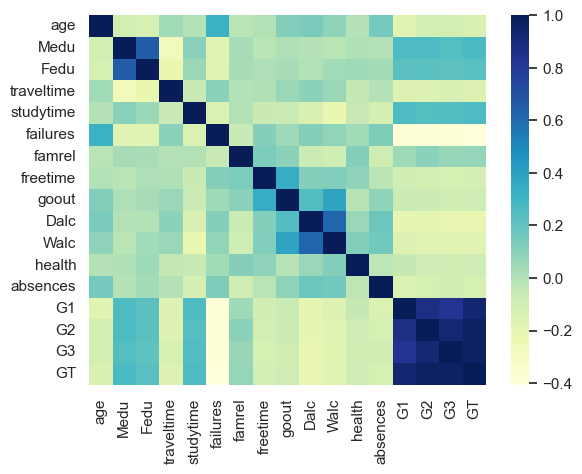

In [10]:
# columns
stuDataNum = stuData.select_dtypes(include=np.int64)

# compute the correlation matrix
corr_matrix = stuDataNum.corr()

# plot the heatmap

sns.heatmap(stuDataNum.corr(), cmap="YlGnBu")

# print the correlation coefficients with respect to GT average

print('Correlation coefficients with respect to GT_avg:')
print(corr_matrix['GT'].sort_values(ascending=False))


The grades G1, G2, and G3 are strongly positively correlated, indicating that an increase in G1 is likely to result in increases in G2 and G3 as well.
We observed a strong correlation between average grades and factors like studytime, mother's education , father's education.

In [11]:
#Average round up to nearest whole number
stuData['GT'] = stuData['G1'] + stuData['G2'] + stuData['G3']
stuData['GT_avg'] = round(stuData['GT'] / 3).astype(int)

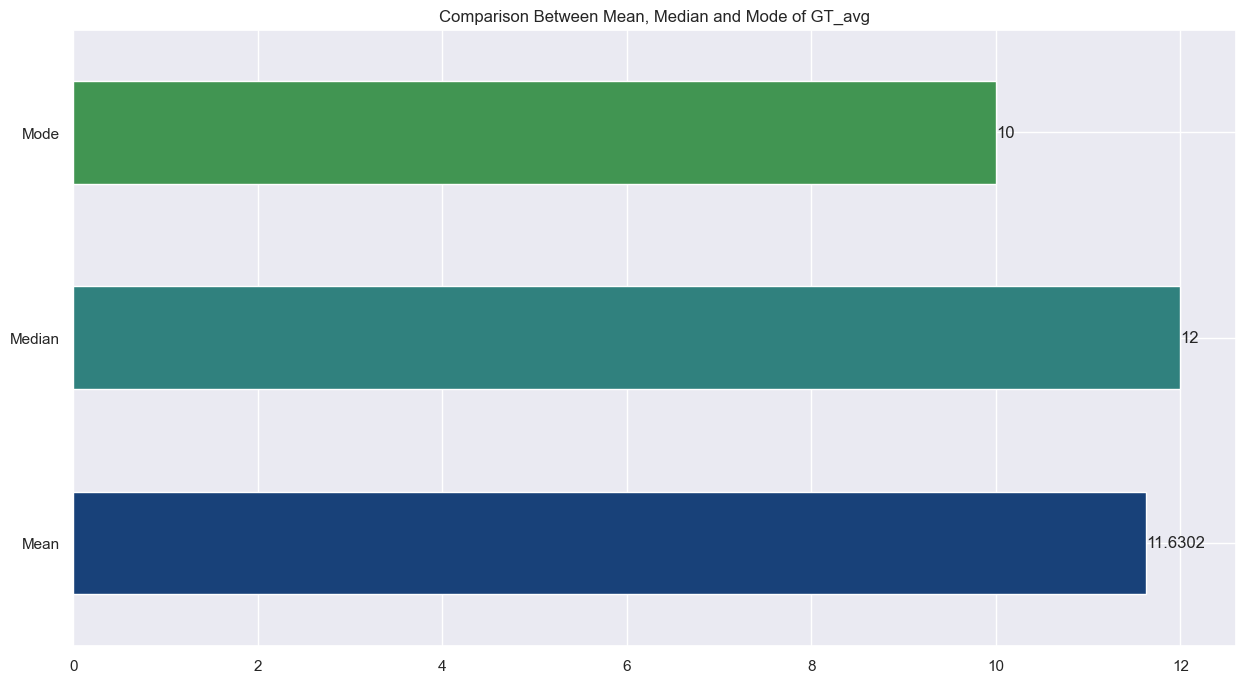

In [12]:
import seaborn as sns

plt.figure(figsize=(15,8))
ax=pd.Series({'Mean': stuData.GT_avg.mean(), 'Median': stuData.GT_avg.median(), 'Mode': stuData.GT_avg.mode()[0]}).plot(kind='barh',
title='Comparison Between Mean, Median and Mode of GT_avg', color=sns.color_palette('gist_earth'))

for container in ax.containers:
    ax.bar_label(container)

plt.show()

Text(0.5, 0.98, 'Parents Education ')

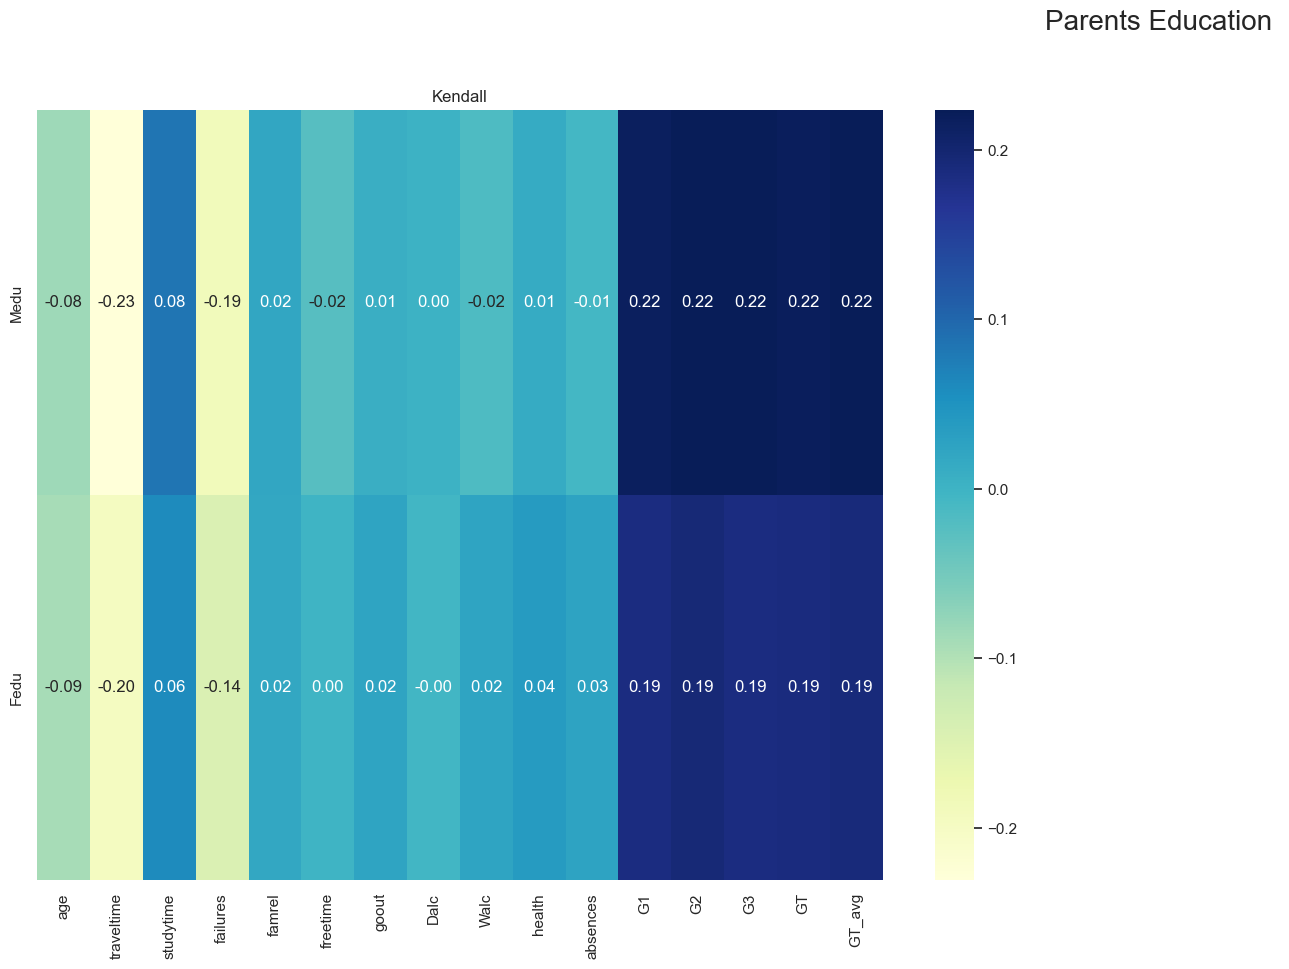

In [13]:
fig = plt.figure(figsize = (30,10))
g = gs.GridSpec(ncols = 2, nrows = 1, figure = fig)

ordin = ["school", "sex", "address", "famsize", "Pstatus", "Medu", "Fedu", "Mjob", "Fjob", "reason", "guardian", "schoolsup", "famsup", "paid", "activities", "nursery", "higher", "internet", "romantic"]
cont = ["age", "traveltime", "studytime", "failures", "famrel", "freetime", "goout", "Dalc", "Walc", "health", "absences", "G1", "G2", "G3", "GT", "GT_avg"]

ax1 = plt.subplot(g[0,0])
ax1 = sns.heatmap(stuData[ ordin+cont].corr(method = "kendall")[cont].drop(cont), cmap="YlGnBu", annot = True, fmt=".2f")

plt.title("Kendall")

plt.suptitle("Parents Education ", size = 20)

From the heatmaps, you can see that the variables "Medu" (mother's education) and "Fedu" (father's education) are positively correlated with most of the other variables, indicating that students with parents who have higher education tend to perform better in school and have better health, attendance, and study habits. Additionally, there is a positive correlation between the final grade (G3) and previous grades (G1 and G2), indicating that students who perform well in the beginning of the year tend to continue to do well.

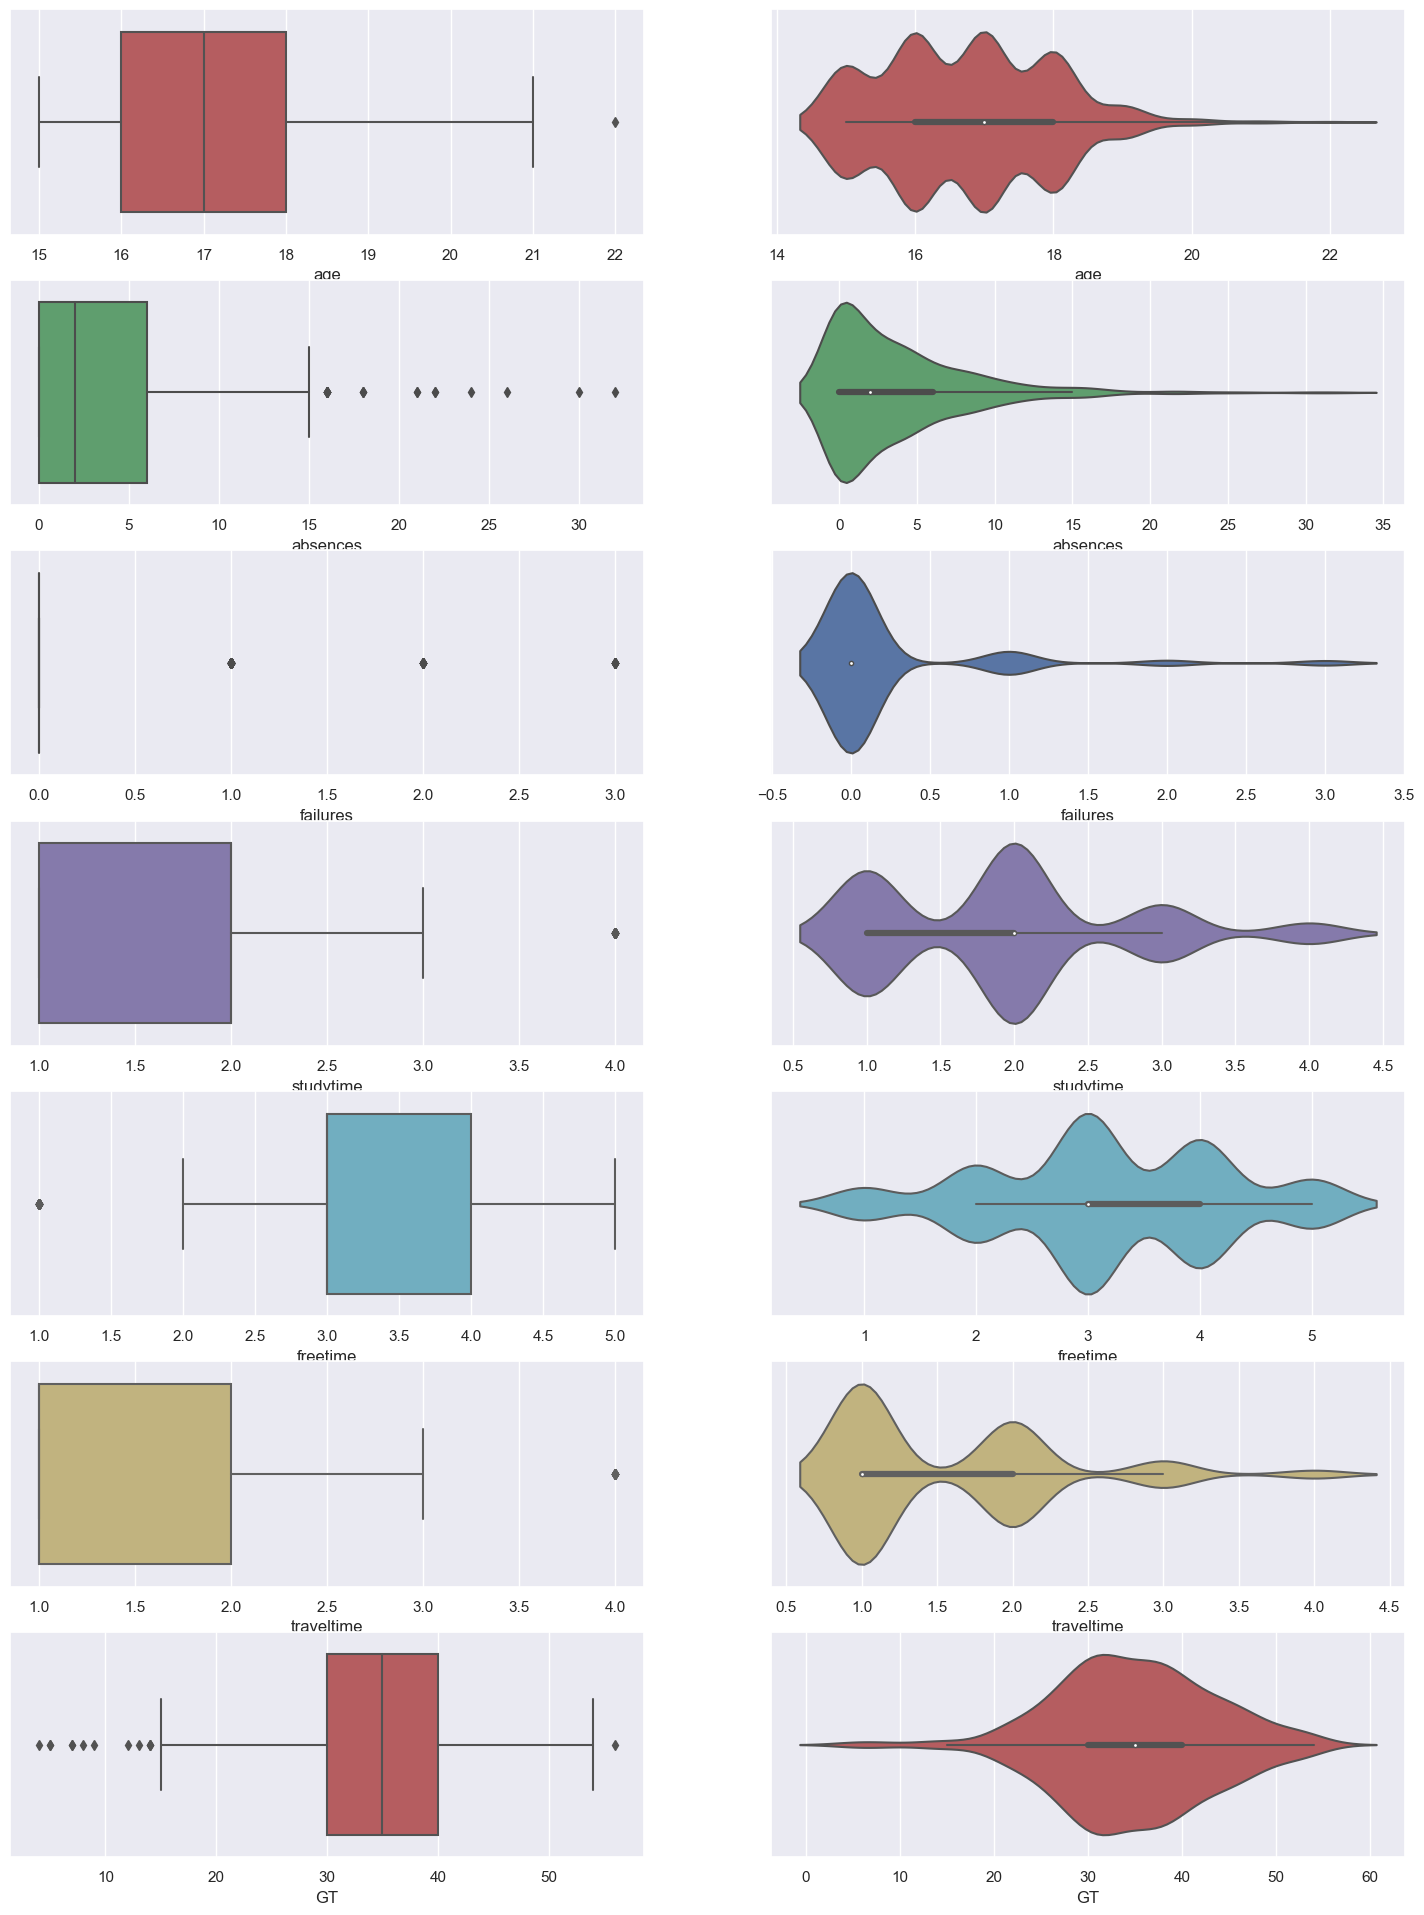

In [14]:
# Numerical Variables
age = stuData['age']
absences  = stuData['absences']
failures = stuData['failures']
studytime = stuData['studytime']
freetime = stuData['freetime']
traveltime = stuData['traveltime']
GT_avg = stuData['GT_avg']
numeric_data = stuData[['age', 'absences', 'failures', 'studytime', 'freetime','traveltime', 'GT']]
# Assuming numeric_data contains only the required variables
f, axes = plt.subplots(7, 2, figsize=(18, 24))
colors = ["r", "g", "b", "m", "c", "y"]
count = 0
for i, var in enumerate(numeric_data.columns):
    sb.boxplot(numeric_data[var], orient="h", color=colors[count], ax=axes[i, 0])
    sb.violinplot(numeric_data[var], color=colors[count], ax=axes[i, 1])
    count = (count + 1) % len(colors)
plt.show()


In [15]:

numeric_data.describe().round(2)

,age,absences,failures,studytime,freetime,traveltime,GT
count,649.00,649.00,649.00,649.00,649.00,649.00,649.00
mean,16.74,3.66,0.22,1.93,3.18,1.57,34.88
std,1.22,4.64,0.59,0.83,1.05,0.75,8.50
min,15.00,0.00,0.00,1.00,1.00,1.00,4.00
25%,16.00,0.00,0.00,1.00,3.00,1.00,30.00
50%,17.00,2.00,0.00,2.00,3.00,1.00,35.00
75%,18.00,6.00,0.00,2.00,4.00,2.00,40.00
max,22.00,32.00,3.00,4.00,5.00,4.00,56.00


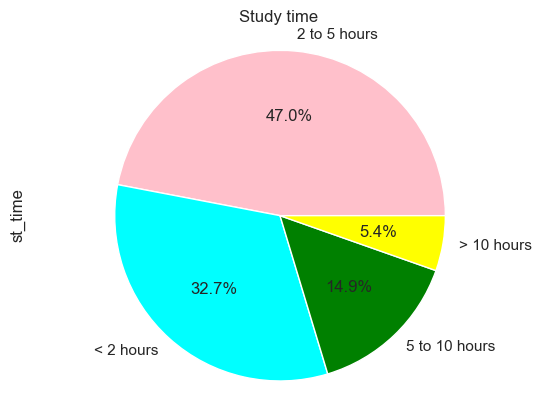

In [16]:
stuData['st_time'] = stuData['studytime'].map({1: '< 2 hours', 2: '2 to 5 hours', 3: '5 to 10 hours', 4: '> 10 hours'})

stuData['st_time'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['pink', 'cyan', 'green', 'yellow'])
plt.title('Study time')
plt.axis('equal')
plt.show()

The majority of students allocate either 2 to 5 or 5 to 10 hours per week for studying. 
It is worth noting the influence of the study time on a student's final grade.

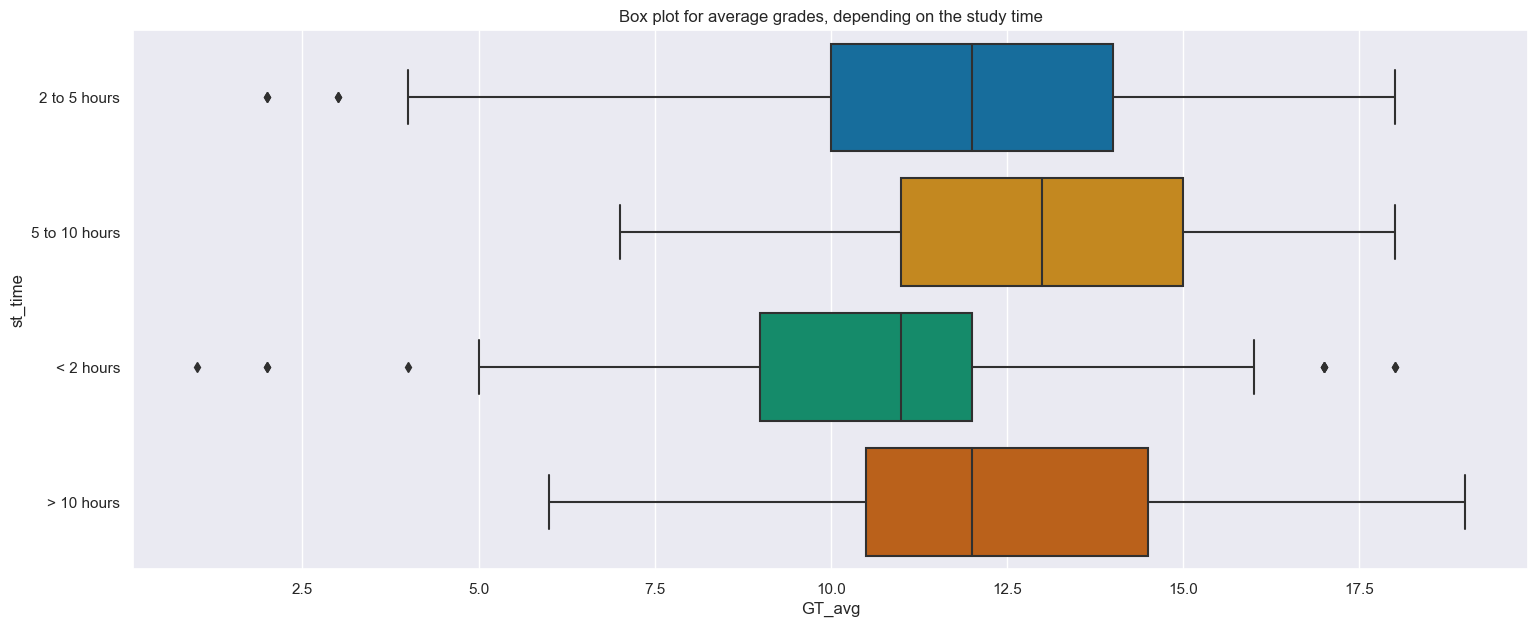

In [17]:

stuData['st_time'] = stuData['studytime'].map({1: '< 2 hours', 2: '2 to 5 hours', 3: '5 to 10 hours', 4: '> 10 hours'})

plt.figure(figsize=(18,7))
plt.title("Box plot for average grades, depending on the study time")
sns.boxplot(y="st_time", x="GT_avg", data=stuData, orient="h", palette='colorblind')
plt.show()


The students who spend less than two hours a week studying have the lowest median average grade.
On the other hand, students who spend more than 5 hours a week studying show a higher median with higher grades. 

<AxesSubplot:>

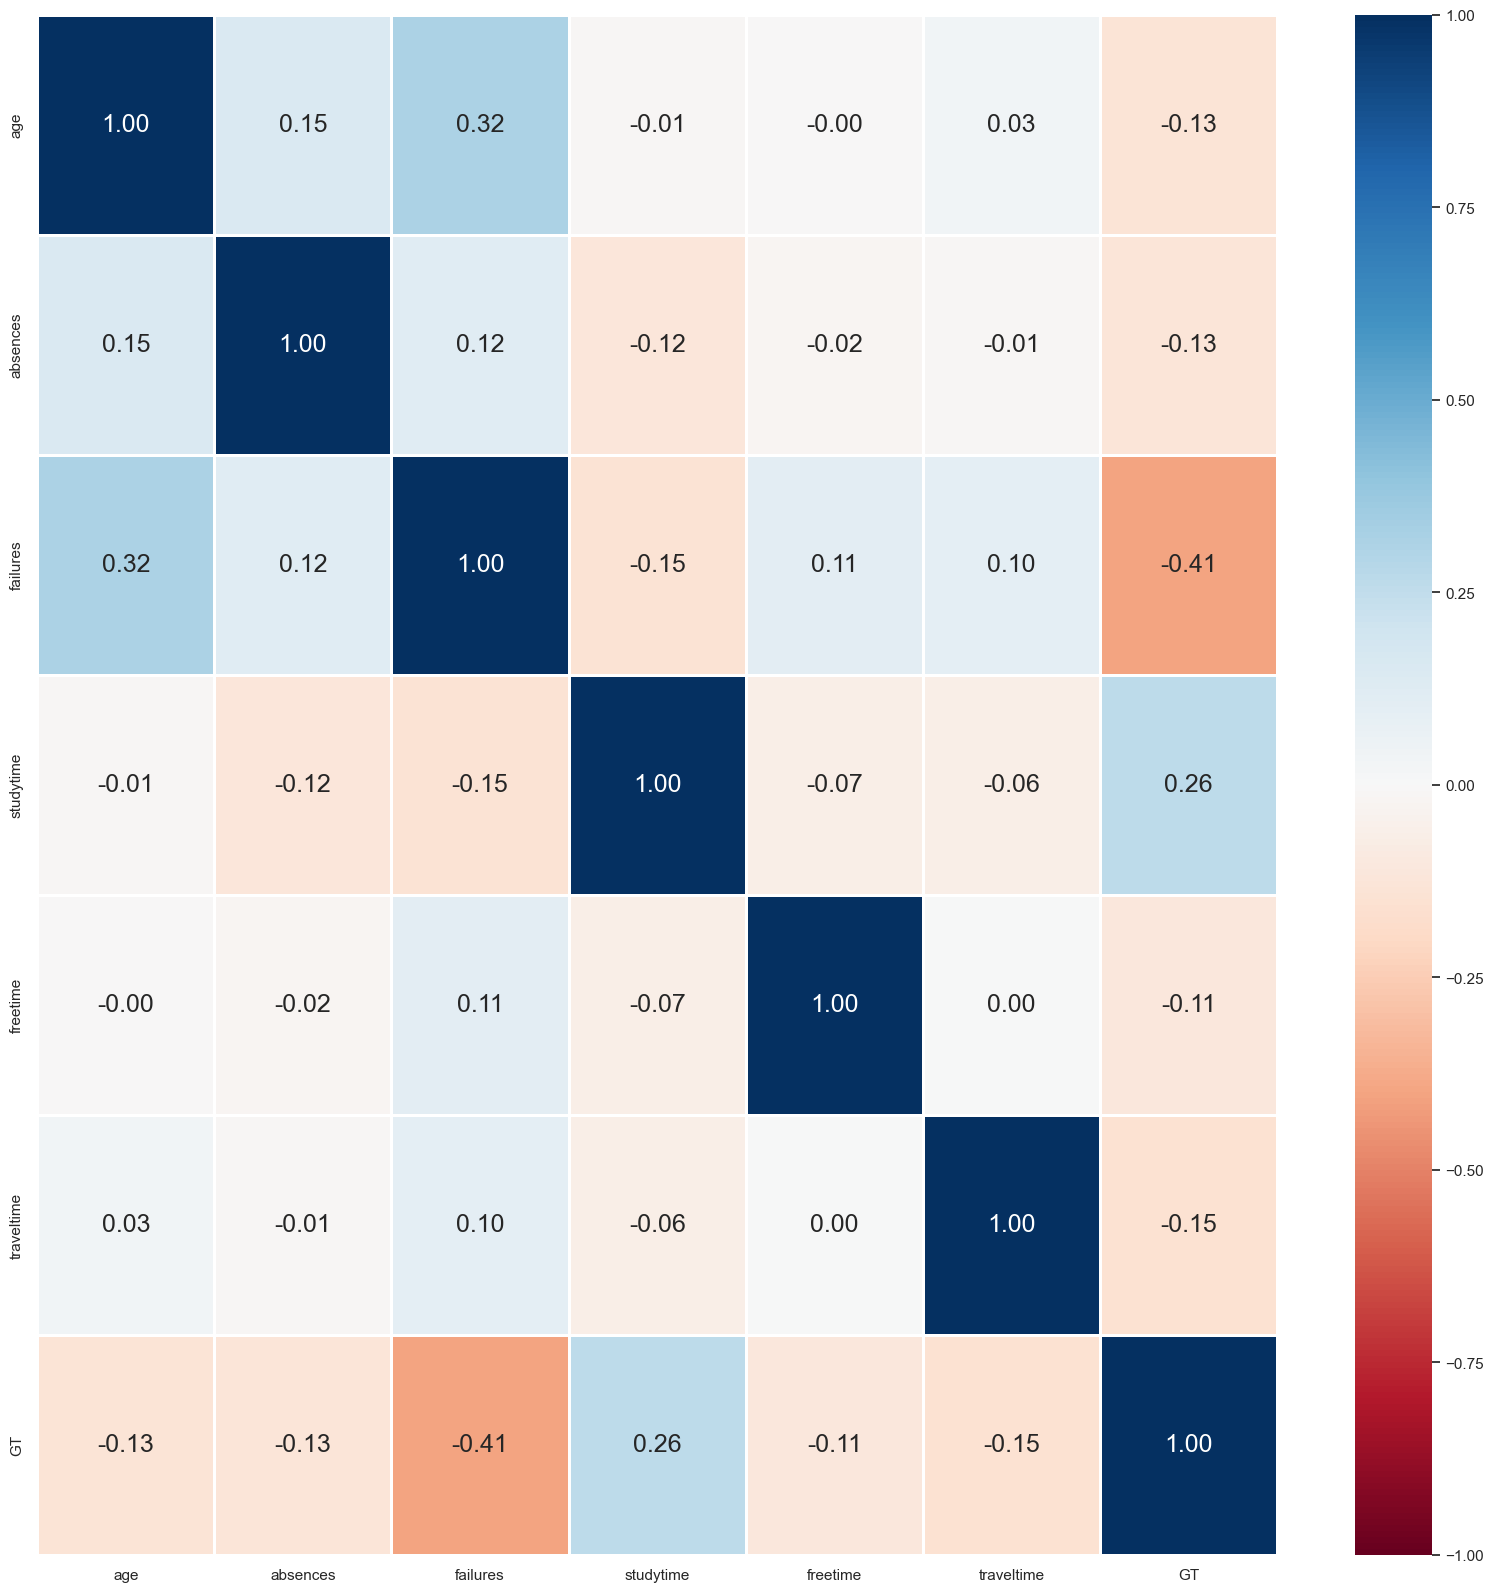

In [18]:
(numeric_data.corr())

f,axes = plt.subplots(1, 1, figsize=(20,20))
sb.heatmap(numeric_data.corr(), vmin =-1, vmax =1, linewidths =1, annot = True, fmt =".2f", annot_kws ={"size":18}, cmap = "RdBu")


Based on the heatmap, we can observe that there is a negative correlation between failures, indicating that as the number of failures increases, grades tend to decrease.

Moreover, we can see a weak positive correlation between age and absences, which suggests that as age increases, there is a slight tendency for absences to also increase.

Furthermore, there is a weak negative correlation between both age and absences with average grades. This indicates that as age or absences increase, grades are likely to decrease, suggesting that these factors may negatively impact a student's academic performance.

<AxesSubplot:xlabel='failures', ylabel='G3'>

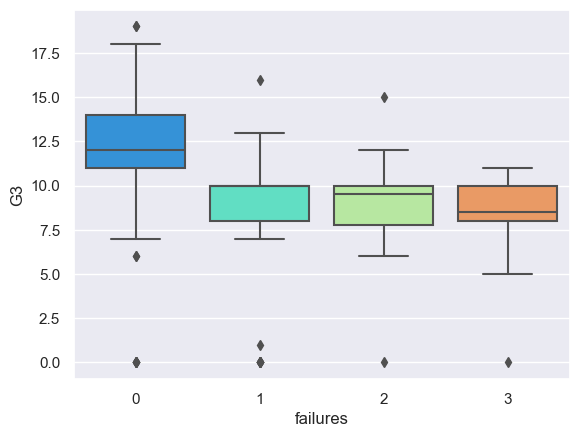

In [19]:
# Boxplot of absences against Average Score
sb.boxplot(x= "failures", y="G3", data=stuData, palette='rainbow')

From the data, it appears that students who consistently score well without failing any tests tend to have higher scores in the final exam compared to students who have failed a few tests. This suggests that the former group may have a stronger foundation in the subject, which allows them to build upon their knowledge and perform well in subsequent assessments.

In contrast, students who have failed one or more tests may have gaps in their understanding of the subject, which can impede their ability to perform well in future assessments. As a result, their scores may not even reach the lower quartile of students who have never failed before

<AxesSubplot:xlabel='age'>

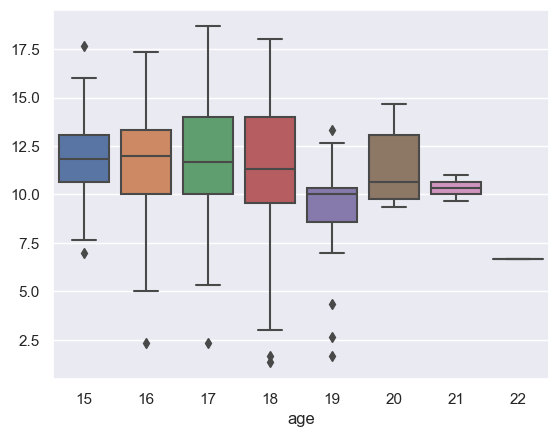

In [20]:
# Boxplot of Age against Average Score  
sb.boxplot(x= "age", y= avgScore, data=stuData)

The data indicates that as the age of students increases, their median grade tends to decrease. 
In other words, older students generally score lower grades.

<AxesSubplot:xlabel='absences'>

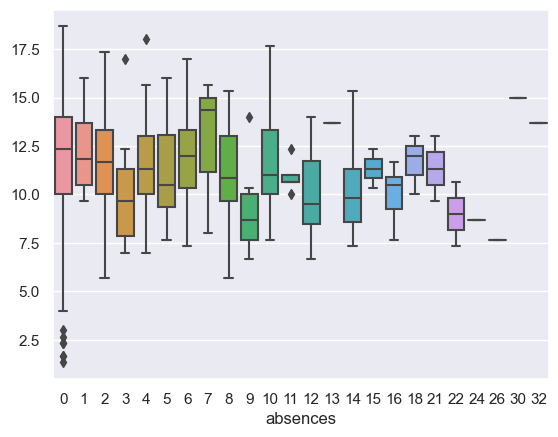

In [21]:
# Boxplot of absences against Average Score
sb.boxplot(x= "absences", y= avgScore, data=stuData)

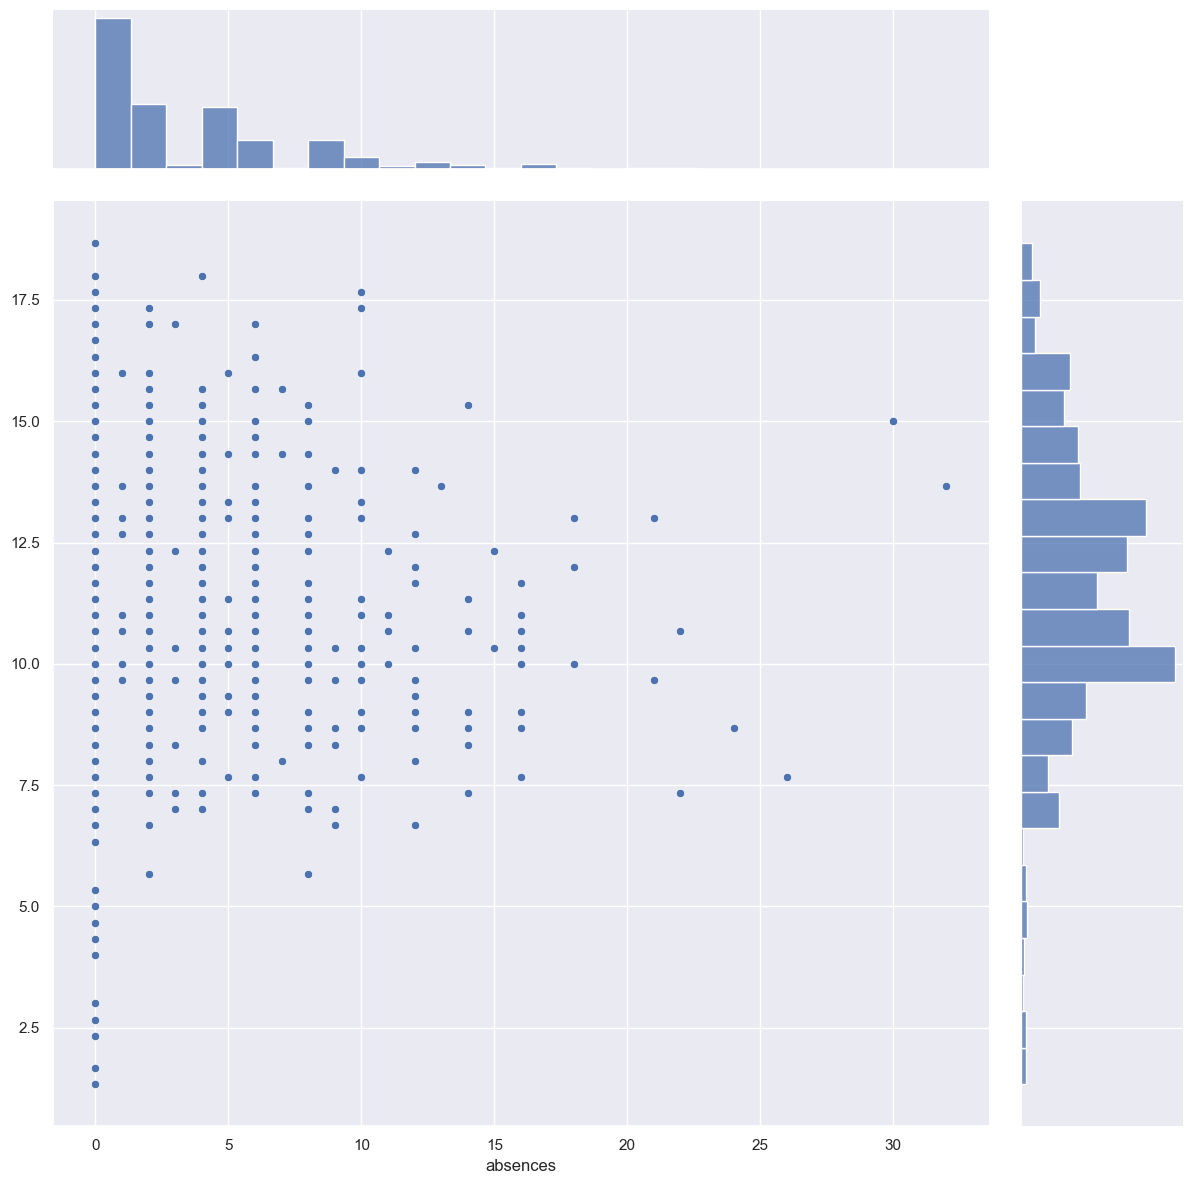

In [22]:
# Create a joint dataframe by concatenating the two variables
jointDF = pd.concat([absences, avgScore], axis = 1).reindex(age.index)

# Draw jointplot of the two variables in the joined dataframe
sb.jointplot(data = jointDF, x = "absences", y = avgScore, height = 12)

Based on the boxplot and jointplot, it appears that there is a relationship between student absences and their grades. Specifically, an increase in absences is associated with a lower average grade score, suggesting that students perform poorly when they have a high number of absences. This may be because they struggle to catch up on missed topics and fall behind in their understanding of the subject.

In [23]:
stuData['Medu'] = stuData['Medu'].astype('object')
stuData['Fedu'] = stuData['Fedu'].astype('object')


stuDatacat = stuData.select_dtypes(include = np.object)
print("Data dims : ", stuDatacat.shape) 
stuDatacat.info()


Data dims :  (649, 21)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 649 entries, 0 to 648
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   address     649 non-null    object
 3   famsize     649 non-null    object
 4   Pstatus     649 non-null    object
 5   Medu        649 non-null    object
 6   Fedu        649 non-null    object
 7   Mjob        649 non-null    object
 8   Fjob        649 non-null    object
 9   reason      649 non-null    object
 10  guardian    649 non-null    object
 11  schoolsup   649 non-null    object
 12  famsup      649 non-null    object
 13  paid        649 non-null    object
 14  activities  649 non-null    object
 15  nursery     649 non-null    object
 16  higher      649 non-null    object
 17  internet    649 non-null    object
 18  romantic    649 non-null    object
 19  subject     649 non-null   

In [24]:
#Categorical Variables needed


Medu = stuData['Medu']
Fedu = stuData['Fedu']
famrel= stuData['famrel']
goout = stuData['goout']
dalc = stuData['Dalc']
walc = stuData['Walc']
health = stuData['health']


print("No. of unique levels for Mother's Education: " , len(Medu.unique()))
print("No. of unique levels for Father's Education: " , len(Fedu.unique()))
print("No. of unique levels for quality of Family Relationship: " , len(famrel.unique()))
print("No. of unique levels for Going Out : " , len(goout.unique()))
print("No. of unique levels for Weekday Alcohol Consumption: " , len(dalc.unique()))
print("No. of unique levels for Weekend Alcohol Consumption: " , len(walc.unique()))
print("No. of unique levels for Health Status: " , len(health.unique()))




No. of unique levels for Mother's Education:  5
No. of unique levels for Father's Education:  5
No. of unique levels for quality of Family Relationship:  5
No. of unique levels for Going Out :  5
No. of unique levels for Weekday Alcohol Consumption:  5
No. of unique levels for Weekend Alcohol Consumption:  5
No. of unique levels for Health Status:  5


<AxesSubplot:xlabel='Fjob'>

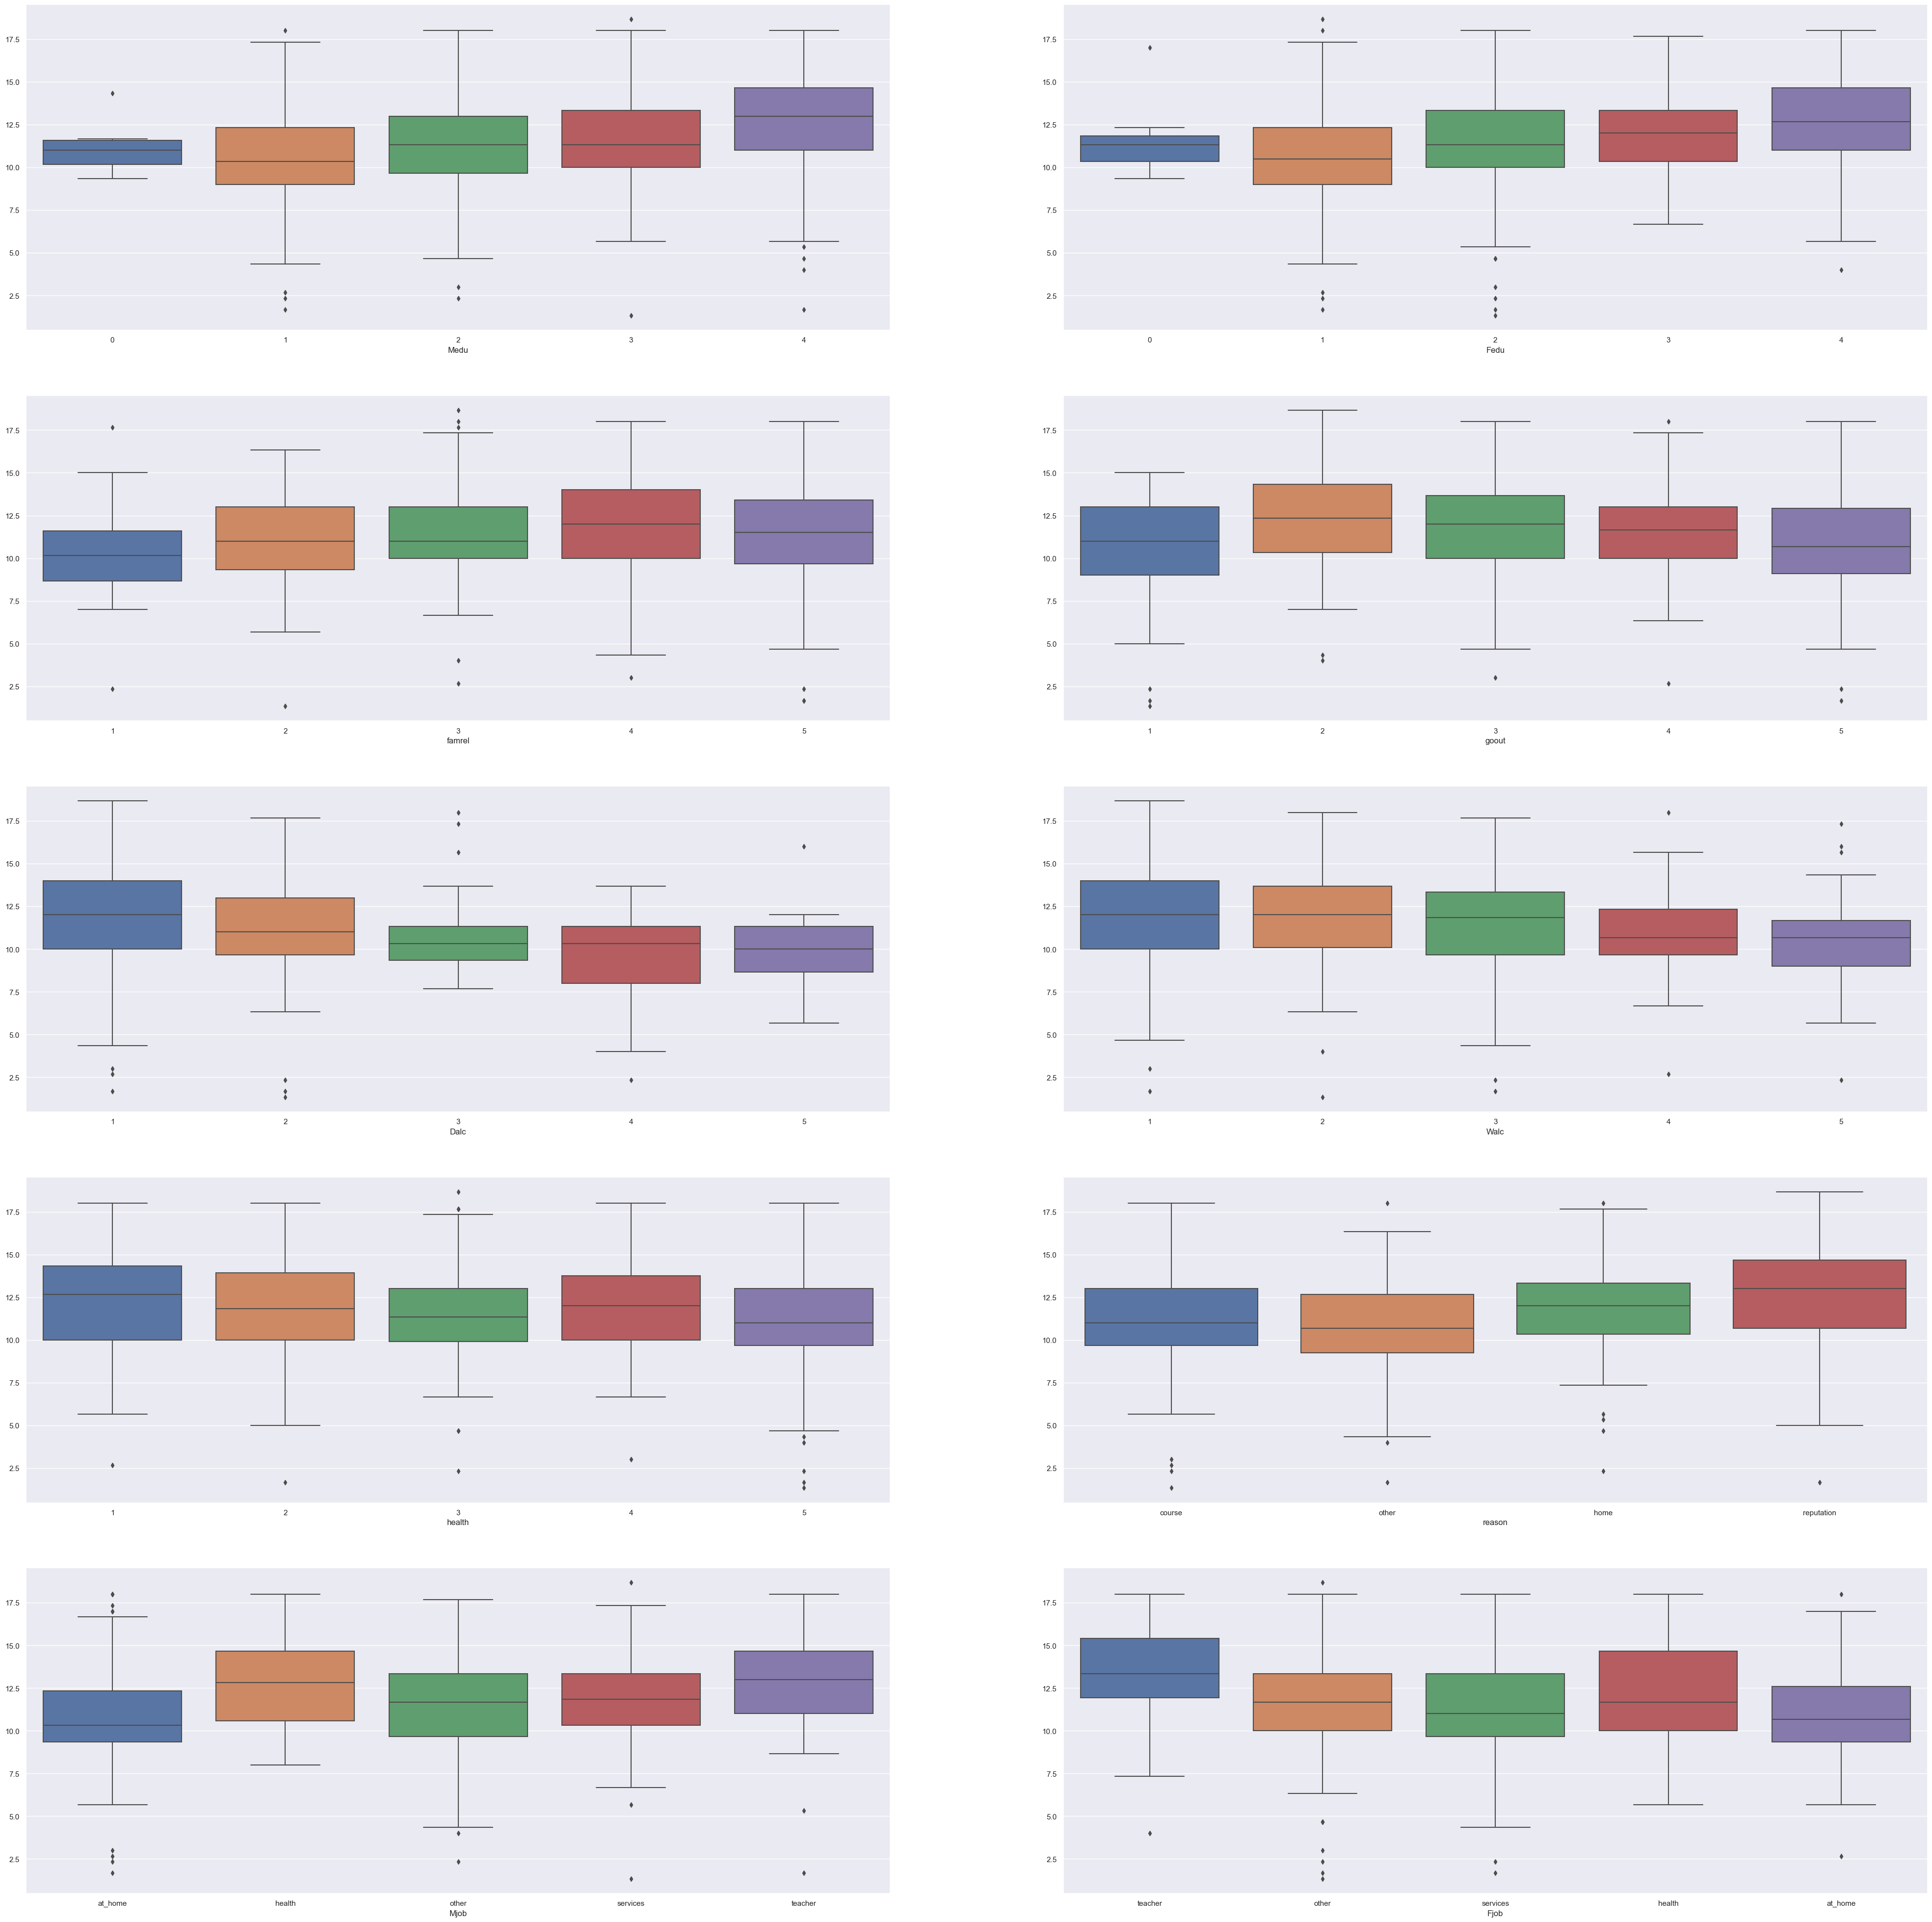

In [25]:
f, axes = plt.subplots(5, 2, figsize=(50, 50))
sb.boxplot(x= "Medu", y= avgScore, data=stuData, ax = axes[0,0])
sb.boxplot(x= "Fedu", y= avgScore, data=stuData, ax = axes[0,1])
sb.boxplot(x= "famrel", y= avgScore, data=stuData, ax = axes[1,0])
sb.boxplot(x= "goout", y= avgScore, data=stuData, ax = axes[1,1])
sb.boxplot(x= "Dalc", y= avgScore, data=stuData, ax = axes[2,0])
sb.boxplot(x= "Walc", y= avgScore, data=stuData, ax = axes[2,1])
sb.boxplot(x= "health", y= avgScore, data=stuData, ax = axes[3,0])
sb.boxplot(x= "reason", y= avgScore, data=stuData, ax = axes[3,1])
sb.boxplot(x= "Mjob", y= avgScore, data=stuData, ax = axes[4,0])
sb.boxplot(x= "Fjob", y= avgScore, data=stuData, ax = axes[4,1])

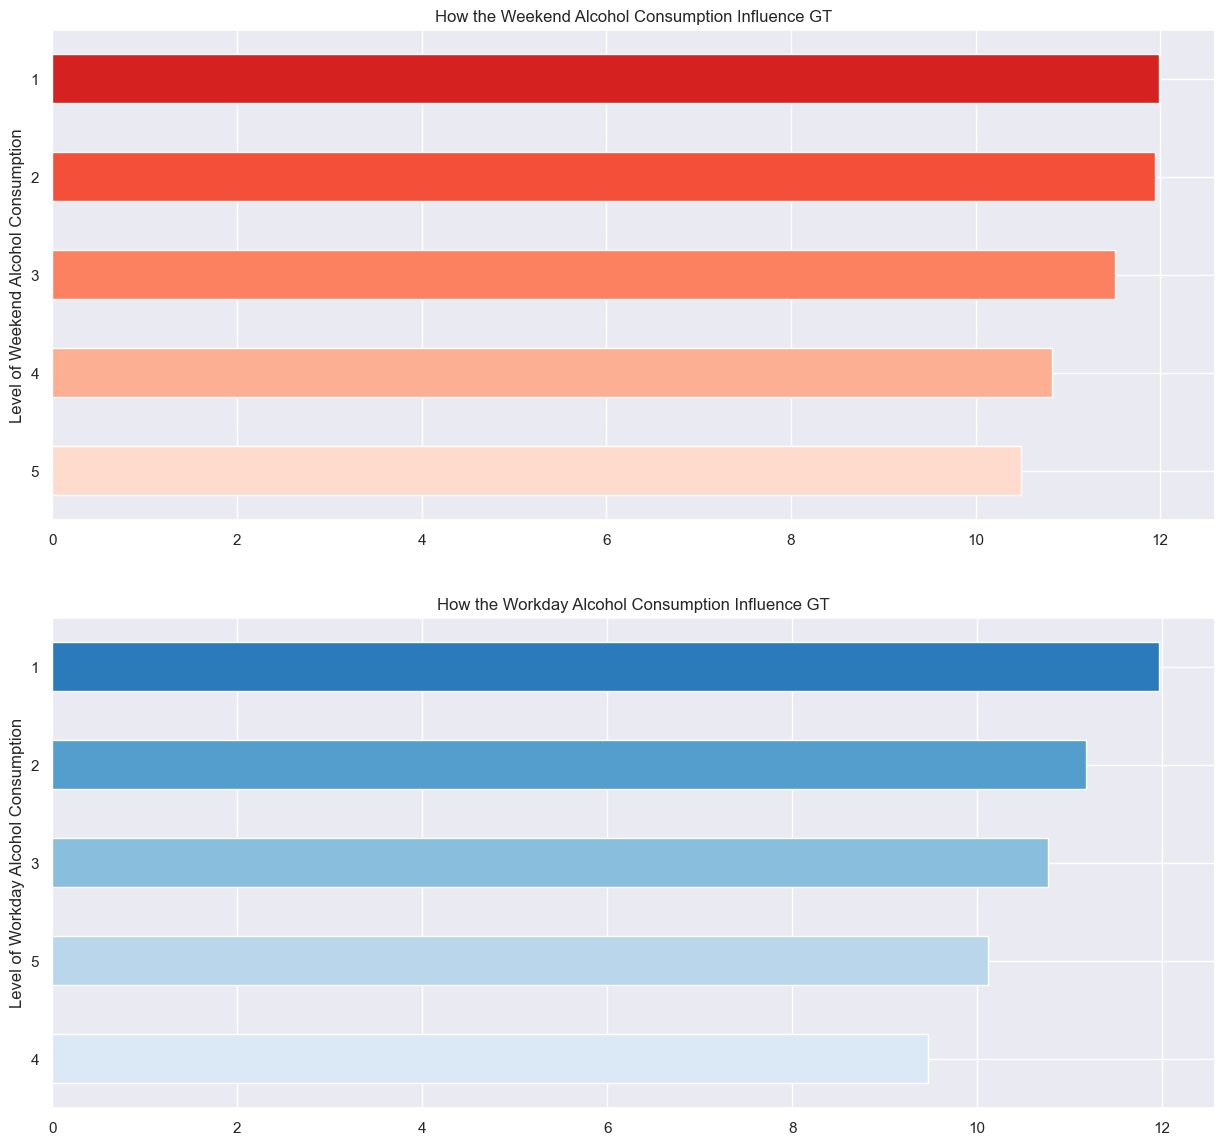

In [26]:
f, axes=plt.subplots(2,1,figsize=(15,14))

pd.Series({item:stuData[stuData['Walc']==item]['GT_avg'].mean() for item in stuData['Walc'].unique()}).sort_values().plot(kind='barh',
color=sns.color_palette('Reds'), title='How the Weekend Alcohol Consumption Influence GT',
xlabel='Level of Weekend Alcohol Consumption', ax=axes[0])

pd.Series({item:stuData[stuData['Dalc']==item]['GT_avg'].mean() for item in stuData['Dalc'].unique()}).sort_values().plot(kind='barh',
color=sns.color_palette('Blues'), title='How the Workday Alcohol Consumption Influence GT',
xlabel='Level of Workday Alcohol Consumption', ax=axes[1])

plt.show()

The charts suggest that higher levels of alcohol consumption, especially on weekends, are associated with lower average final grades among students, indicating a negative impact on academic performance. Although the effect is stronger for weekend alcohol consumption, workday alcohol consumption also shows a slight negative impact on final grades.

If we bring all features to the same scale, we are able to assess feature importance by coefficients (weights) of the linear regression modelFor encoding the categorical features One Hot Encoding technique will be used.



In [27]:
#One Hot Encoding (NEW) 
stuData = pd.read_csv(r"C:\Users\priya\Downloads\archive\student-por.csv")
df = pd.DataFrame(stuData)
features_imp = df.copy().drop(['G1', 'G2', 'G3'], axis=1)
target_imp = avgScore.copy()
print(features_imp.shape)
print(target_imp.shape)

(649, 30)
(649,)


In [28]:
ohe_columns =[]
for col in features_imp.columns:
    if col not in ['age', 'absences']:
        ohe_columns.append(col)
features_imp = pd.get_dummies(features_imp, drop_first=True, columns=ohe_columns)
features_imp.head()   

,age,absences,school_MS,sex_M,address_U,famsize_LE3,Pstatus_T,Medu_1,Medu_2,Medu_3,...,Dalc_4,Dalc_5,Walc_2,Walc_3,Walc_4,Walc_5,health_2,health_3,health_4,health_5
0,18,4,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,17,2,0,0,1,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,15,6,0,0,1,1,1,1,0,0,...,0,0,0,1,0,0,0,1,0,0
3,15,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,16,0,0,0,1,0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,1


In [29]:
linear_regressor = LinearRegression()
linear_regressor.fit(features_imp, target_imp)

LinearRegression()

In [30]:
feature_importances_lr_coef = pd.concat([pd.Series(features_imp.columns, name='features'), 
                                         pd.Series(linear_regressor.coef_, name='weights')],
                                        axis=1)

In [31]:
feature_importances_lr_coef.head(5)

,features,weights
0,age,0.136526
1,absences,-0.036403
2,school_MS,-1.050553
3,sex_M,-0.632332
4,address_U,0.306336


In [32]:
#The sign of weights is not important, so we use the absolute values.
feature_importances_lr_coef['weights'] = abs(feature_importances_lr_coef['weights'])

In [33]:
# 20 features that have the strongest influence on the target.
feature_importances_lr_coef = feature_importances_lr_coef.sort_values(by='weights', ascending=False).reset_index(drop=True)

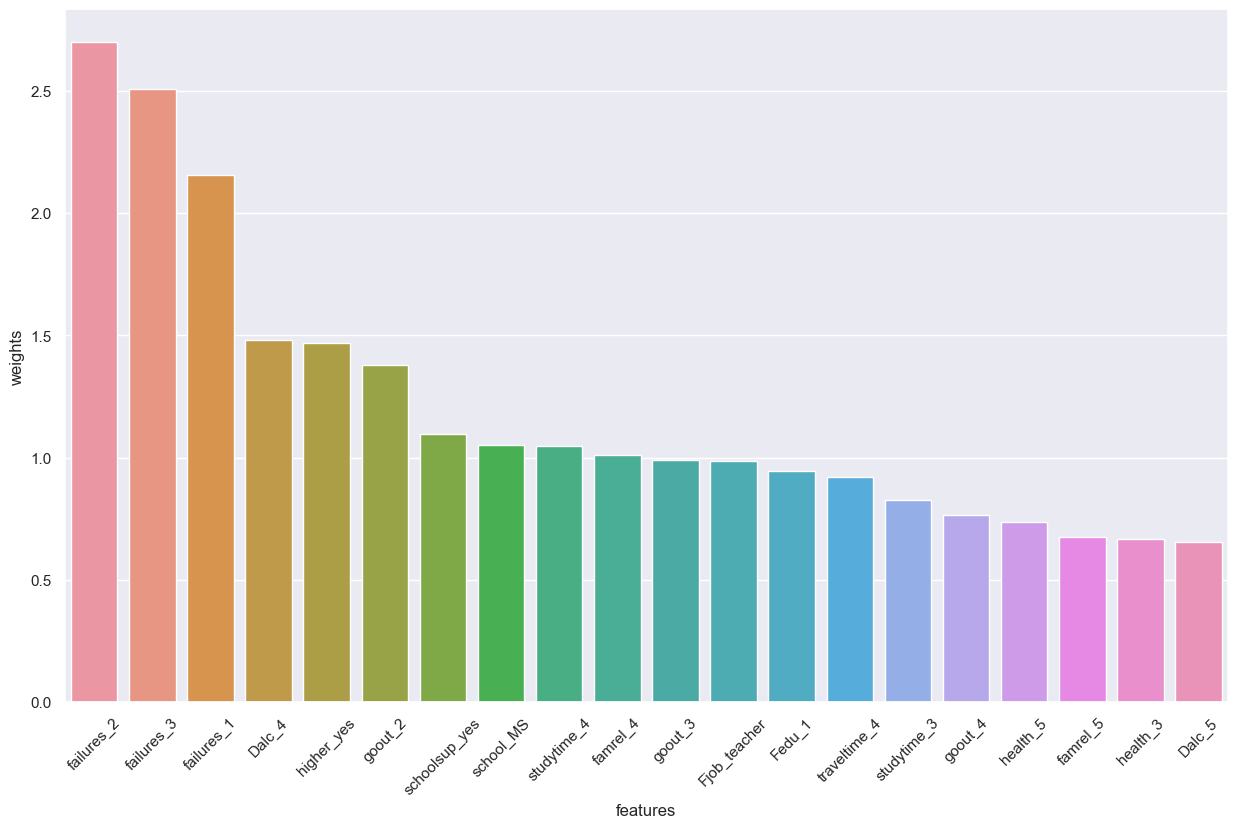

In [34]:
plt.figure(figsize=(15,9))
sb.barplot(data=feature_importances_lr_coef[:20], x='features', y='weights')
plt.xticks(rotation=45)
plt.show()

Combining related dummy variables into single features, we can highlight the most important features:

failures - Number of past class failures.

Dalc - Workday Alcohol Consumption

higher - Wants to take higher education.

Freetime - free time after school.

goout - Going out with friends

schoolsup - Extra educational support.

school - Student's school ('GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)

studytime - Weekly study time.

famrel - Quality of family relationships.

Fjob - Father's job (whether father is teacher or not).

Fedu - Father's education.

traveltime - Home to school travel time.

health - Current health status.



The most important features based on the Random Forest:

higher - Wants to take higher education

failures - Number of past class failures

school - Student's school ('GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)

absences - Number of school absences

age - Student's age

Medu - Mother's education

sex - Student's gender

schoolsup - Extra educational support

failures - number of past class failures
age.

reason - Reason to choose this school

goout - Going out with friends

Dalc - Workday Alcohol Consumption

Fedu - Father's education

famrel - Quality of family relationships

studytime - Weekly study time

Fjob - Father's job (whether father is teacher or not)

famsup - Family educational support

internet - Internet access at home 

address - Student's home address type 


Text(0.5, 1.0, 'What is the number of students who desire to pursue higher education?')

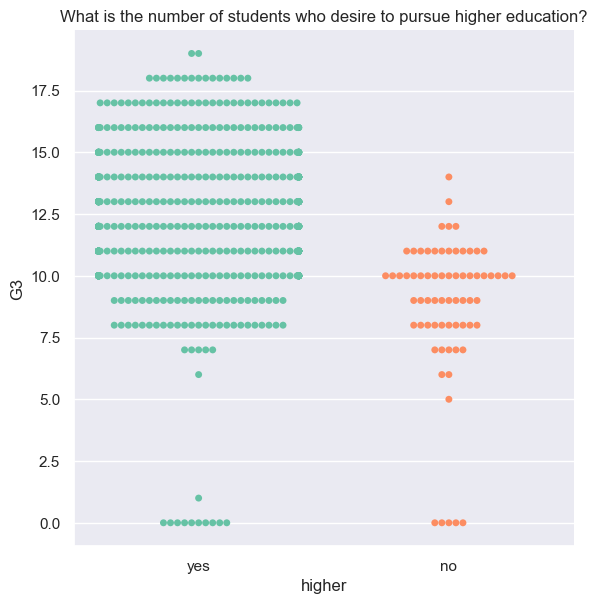

In [35]:

# create a swarm plot of final grades by desire for higher education
sns.catplot(x="higher", y="G3", kind="swarm",palette ="Set2", data=stuData, height=6)
plt.title("What is the number of students who desire to pursue higher education?")


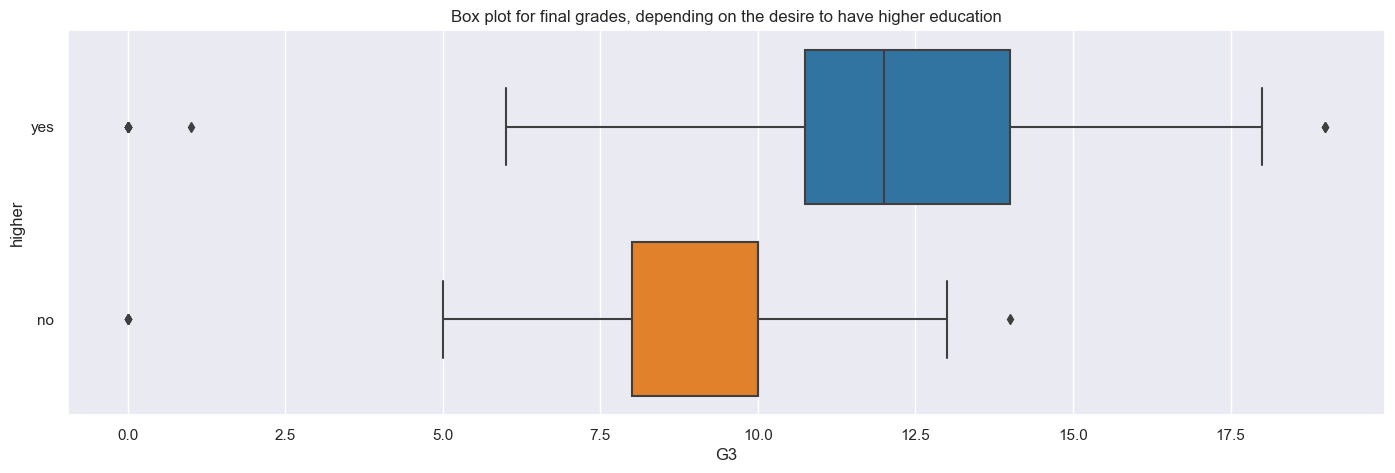

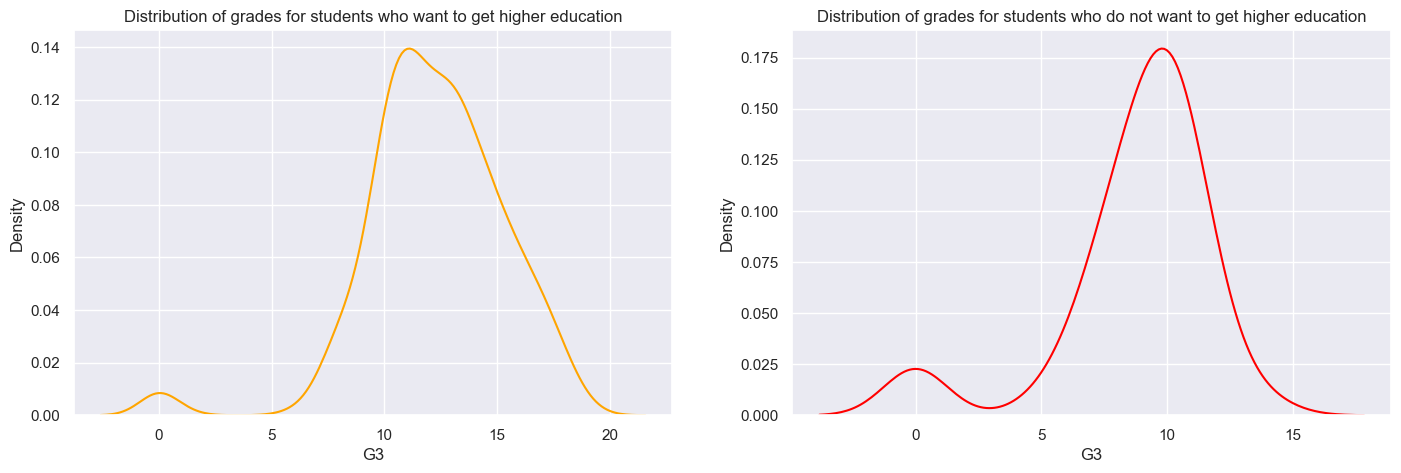

In [36]:
# Create a boxplot of final grades by aspiration for higher education
plt.figure(figsize=(17,5))
sns.boxplot(y="higher", x="G3", data=stuData, orient="h", palette='tab10')
plt.title("Box plot for final grades, depending on the desire to have higher education")

# Create two density plots of final grades for students who want or do not want higher education
fig, axs = plt.subplots(ncols=2, figsize=(17,5))
for ax, want_higher_edu in zip(axs, [True, False]):
    sns.kdeplot(data=stuData[stuData['higher'] == ('yes' if want_higher_edu else 'no')], x='G3', ax=ax, color='orange' if want_higher_edu else 'red')
    ax.set_title(f"Distribution of grades for students who {'want' if want_higher_edu else 'do not want'} to get higher education")

The students who aspire to pursue higher education tend to score higher grades, as evidenced by the higher median score among this group. Having a goal to achieve higher education serves as a motivation for these students to perform well and meet the threshold required for admission.

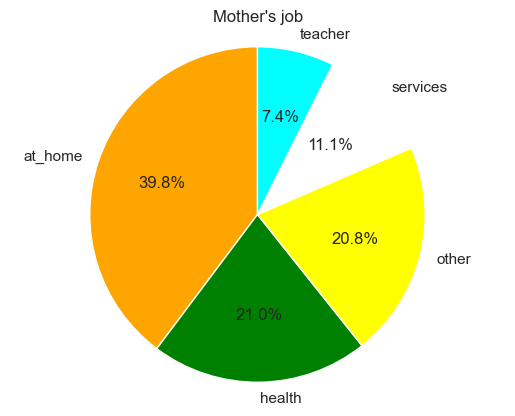

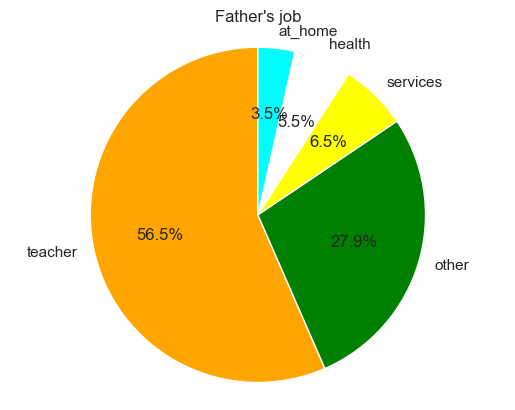

In [37]:

import matplotlib.pyplot as plt

# Pie chart for mother's job
labels = stuData["Mjob"].unique()
amount = stuData["Mjob"].value_counts()

colors = ["orange", "green", "yellow", "white",'cyan']

plt.pie(amount, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title("Mother's job")
plt.axis('equal')
plt.show()

# Pie chart for father's job
labels = stuData["Fjob"].unique()
amount = stuData["Fjob"].value_counts()

colors = ["orange", "green", "yellow", "white",'cyan']

plt.pie(amount, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title("Father's job")
plt.axis('equal')
plt.show()



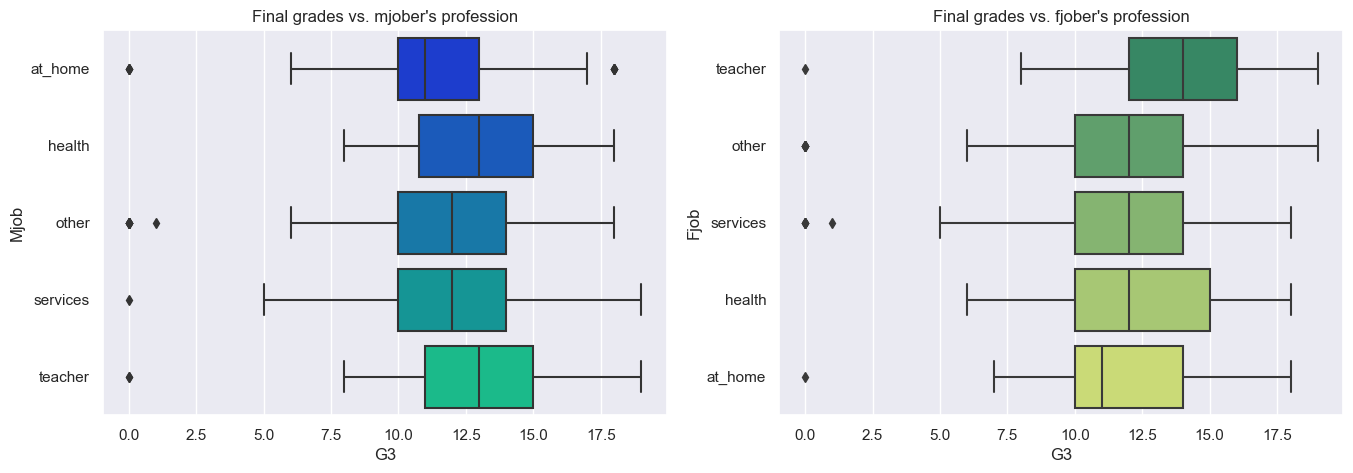

In [38]:
fig, axes = plt.subplots(1, 2, figsize=(16,5))

for i, job in enumerate(["Mjob", "Fjob"]):
    sns.boxplot(y=job, x="G3", data=stuData, orient="h", palette='winter' if i == 0 else 'summer', ax=axes[i])
    axes[i].set_title(f"Final grades vs. {job.lower()}er's profession")

plt.show()

We can observe that students whose parents are teachers tend to score higher grades compared to students whose parents have other professions. This is evident from the box plot where the median grade of students with teacher parents is significantly higher. This could be because parents who are teachers can provide additional support to their children with their language and academic skills

Text(0.5, 1.0, 'What is the number of students who had access to internet')

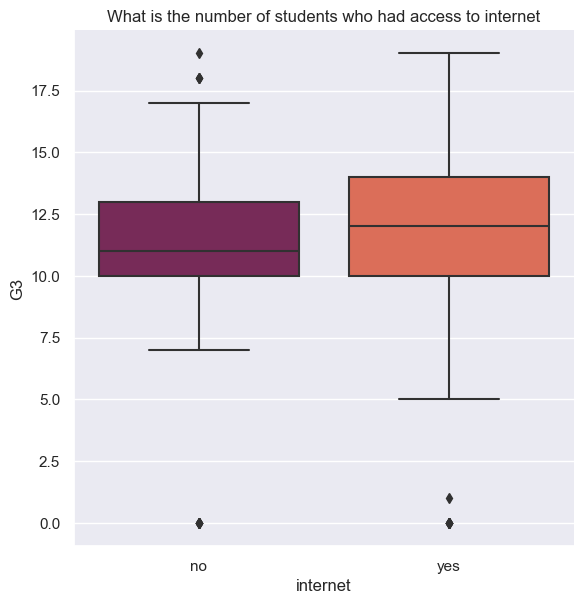

In [39]:
# create a swarm plot of final grades by desire for higher education
sns.catplot(x="internet", y="G3", kind="box",palette ="rocket", data=stuData, height=6)
plt.title("What is the number of students who had access to internet")


Based on the box plot, students who have access to the internet achieved higher grades compared to those who don't have access. The median score of students with internet access is also higher, and the upper quartile extends further, indicating a better performance. This suggests that internet access may have provided additional resources that helped students with their language skills, leading to better grades.

In [40]:
#GridSearchCV will be applied.
parameters = {'max_depth' : [8, 10, 12, 20],
              'n_estimators' : [200, 250, 300],
              'max_features' : [5, 25, 50],
              'min_samples_split' : [2, 4, 6]}
grid_search = GridSearchCV(estimator = RandomForestRegressor(random_state=42),
                           param_grid = parameters,
                           scoring = 'neg_mean_squared_error',
                           cv = 5)
grid_search.fit(features_imp, target_imp)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [8, 10, 12, 20],
                         'max_features': [5, 25, 50],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [200, 250, 300]},
             scoring='neg_mean_squared_error')

In [41]:
grid_search.best_params_

{'max_depth': 10,
 'max_features': 25,
 'min_samples_split': 4,
 'n_estimators': 250}

In [42]:
regressor_rf = RandomForestRegressor(max_depth=12, n_estimators=300, max_features=25, min_samples_split=6, random_state=42)
regressor_rf.fit(features_imp, target_imp)

RandomForestRegressor(max_depth=12, max_features=25, min_samples_split=6,
                      n_estimators=300, random_state=42)

In [43]:
feature_importances_rf = pd.concat([pd.Series(features_imp.columns, name='features'), 
                                    pd.Series(regressor_rf.feature_importances_, name='importance')],
                                    axis=1).sort_values(by='importance', ascending=False).reset_index(drop=True)

In [44]:
feature_importances_rf

,features,importance
0,higher_yes,0.104410
1,failures_1,0.103675
2,school_MS,0.063651
3,absences,0.055097
4,age,0.033891
...,...,...
64,guardian_other,0.003149
65,Fjob_health,0.002964
66,paid_yes,0.002947
67,Dalc_5,0.002586


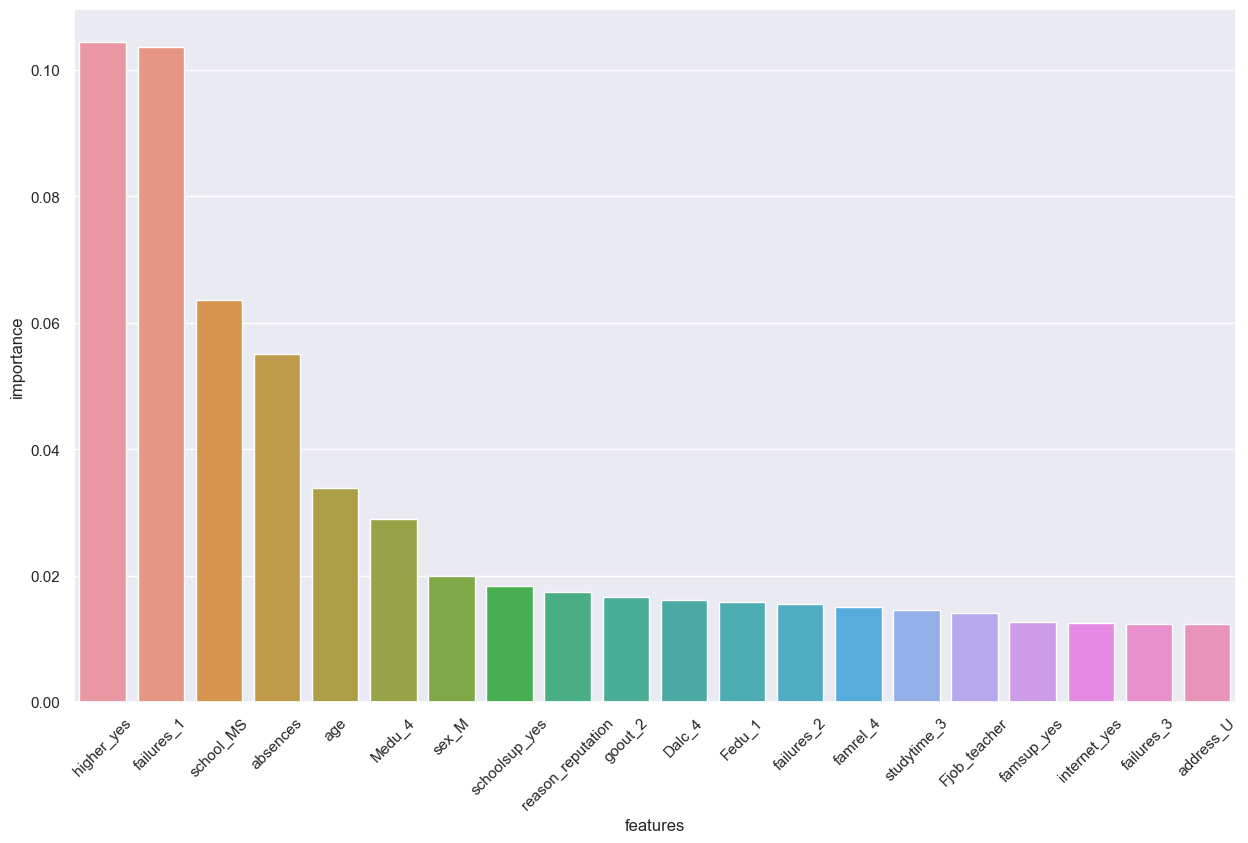

In [45]:
plt.figure(figsize=(15,9))
sb.barplot(data=feature_importances_rf[:20], x='features', y='importance')
plt.xticks(rotation=45)
plt.show()